<a href="https://colab.research.google.com/github/Nevermetyou65/Overwatch-Heroes-recognition-with-Transfer-learning--Xception--/blob/main/transfer_learning_55epochs_with_fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

cwd = os.getcwd()
print(cwd)
data_path = './drive/MyDrive/overwatch_recog/overwatch_newdata/'

hero_name = sorted(os.listdir(data_path))
print(type(hero_name))
print(len(hero_name))
hero_dict = {}
for i, name in enumerate(hero_name):
    hero_dict[i] = name

/content
<class 'list'>
32


In [ ]:
import numpy as np

tmp = []
for sub_folder in os.listdir(data_path):
    # print(sub_folder)
    images = os.listdir(os.path.join(data_path, sub_folder))
    tmp.append(len(images))
    print(f"{sub_folder}: {len(images)}")

print("="*50)
print("mean:", np.mean(tmp))

widowmaker: 178
symmetra: 164
roadrog: 132
zarya: 153
zenyatta: 150
winston: 164
torbjorn: 145
soldier76: 142
tracer: 175
sombra: 156
mercy: 174
reaper: 159
mei: 154
junkrat: 138
reinhardt: 153
mccree: 157
orisa: 136
pharah: 151
lucio: 137
moira: 144
baptiste: 105
brigitte: 134
hanzo: 159
ana: 142
d.va: 195
genji: 156
echo: 113
bastion: 130
doomfist: 114
ball: 82
ashe&bob: 133
sigma: 96
mean: 144.40625


In [ ]:
print(hero_dict)

{0: 'ana', 1: 'ashe&bob', 2: 'ball', 3: 'baptiste', 4: 'bastion', 5: 'brigitte', 6: 'd.va', 7: 'doomfist', 8: 'echo', 9: 'genji', 10: 'hanzo', 11: 'junkrat', 12: 'lucio', 13: 'mccree', 14: 'mei', 15: 'mercy', 16: 'moira', 17: 'orisa', 18: 'pharah', 19: 'reaper', 20: 'reinhardt', 21: 'roadrog', 22: 'sigma', 23: 'soldier76', 24: 'sombra', 25: 'symmetra', 26: 'torbjorn', 27: 'tracer', 28: 'widowmaker', 29: 'winston', 30: 'zarya', 31: 'zenyatta'}


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
# data_gen = ImageDataGenerator(
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# test_save_image_path = './drive/MyDrive/overwatch_recog/preview/'
# test_image_path = './drive/MyDrive/overwatch_recog/overwatch_heroes/'

# test_data = data_gen.flow_from_directory(
#     test_image_path,
#     target_size=(300, 300),
#     batch_size=32,
#     save_to_dir=test_save_image_path,
#     save_format='jpeg'
# )

In [ ]:
# (x ,y) = test_data.next()

In [ ]:
# plt.imshow(x[0].astype(np.int32))

In [ ]:
# hero_dict.get(np.argmax(y[0]))

#Image pipeline

In [ ]:
traindata_gen = ImageDataGenerator(
    validation_split=0.2,
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',)

valdata_gen = ImageDataGenerator(
    validation_split=0.2,
)
# ===========================================================================
batch_size = 32
traindata_batch = traindata_gen.flow_from_directory(
    data_path,
    seed=42,
    target_size=(300, 300),
    batch_size=batch_size,
    shuffle=True,
    subset='training',
)
valdata_batch = valdata_gen.flow_from_directory(
    data_path,
    seed=42,
    target_size=(300, 300),
    batch_size=batch_size,
    subset='validation',
)

Found 3711 images belonging to 32 classes.
Found 910 images belonging to 32 classes.


#Pre-trained model

In [ ]:
# ลองใช้ Xception
base_model = keras.applications.Xception(
    weights='imagenet',
    input_shape=(300, 300, 3),
    include_top=False
)

base_model.trainable=False

83697664/83683744 [==============================] - 1s 0us/step


In [ ]:
# build model
inputs = keras.Input(shape=(300,300,3))
scaler = layers.Rescaling(scale=1./255)
x = scaler(inputs)
x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)
outputs = keras.layers.Dense(units=32, activation='softmax')(x)
model = keras.Model(inputs=inputs, outputs=outputs, name='model_with_sigma')

optim = keras.optimizers.Adam()
loss_fn = keras.losses.CategoricalCrossentropy()
model.compile(
    optimizer=optim,
    loss=loss_fn,
    metrics=[keras.metrics.CategoricalAccuracy()]
)
model.summary()

Model: "model_with_sigma"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
rescaling (Rescaling)        (None, 300, 300, 3)       0         
_________________________________________________________________
xception (Functional)        (None, 10, 10, 2048)      20861480  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                65568     
Total params: 20,927,048
Trainable params: 65,568
Non-trainable params: 20,861,480
_________________________________

In [ ]:
epoch = 55
history_1 = model.fit(traindata_batch, epochs=epoch,
                      steps_per_epoch=116, 
                      validation_data=valdata_batch, 
                      validation_steps=29)

Epoch 1/55
116/116 [==============================] - 1560s 13s/step - loss: 3.0495 - categorical_accuracy: 0.2024 - val_loss: 2.3979 - val_categorical_accuracy: 0.4835
Epoch 2/55
116/116 [==============================] - 173s 1s/step - loss: 2.3624 - categorical_accuracy: 0.4034 - val_loss: 1.9161 - val_categorical_accuracy: 0.5802
Epoch 3/55
116/116 [==============================] - 173s 1s/step - loss: 2.0297 - categorical_accuracy: 0.4834 - val_loss: 1.6571 - val_categorical_accuracy: 0.6242
Epoch 4/55
116/116 [==============================] - 173s 1s/step - loss: 1.8324 - categorical_accuracy: 0.5198 - val_loss: 1.4863 - val_categorical_accuracy: 0.6692
Epoch 5/55
116/116 [==============================] - 174s 1s/step - loss: 1.6932 - categorical_accuracy: 0.5627 - val_loss: 1.3750 - val_categorical_accuracy: 0.6824
Epoch 6/55
116/116 [==============================] - 174s 1s/step - loss: 1.5602 - categorical_accuracy: 0.6009 - val_loss: 1.2962 - val_categorical_accuracy: 0.6

In [ ]:
save_path = './drive/MyDrive/overwatch_recog/55epoch_xception_newdata/'
model.save(save_path)

INFO:tensorflow:Assets written to: ./drive/MyDrive/overwatch_recog/55epoch_xception_newdata/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
# history_1.history.keys()

In [ ]:
def plot_history(epoch, history):
    epoch = np.arange(epoch)
    fig = plt.figure(figsize=(20, 12))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(epoch, history.history.get('loss'), label='train loss')
    ax.plot(epoch, history.history.get('val_loss'), label='val losss')
    plt.legend()
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epoch, history.history.get('categorical_accuracy'), label='train acc')
    ax2.plot(epoch, history.history.get('val_categorical_accuracy'), label='val acc')
    plt.legend()
    plt.show()

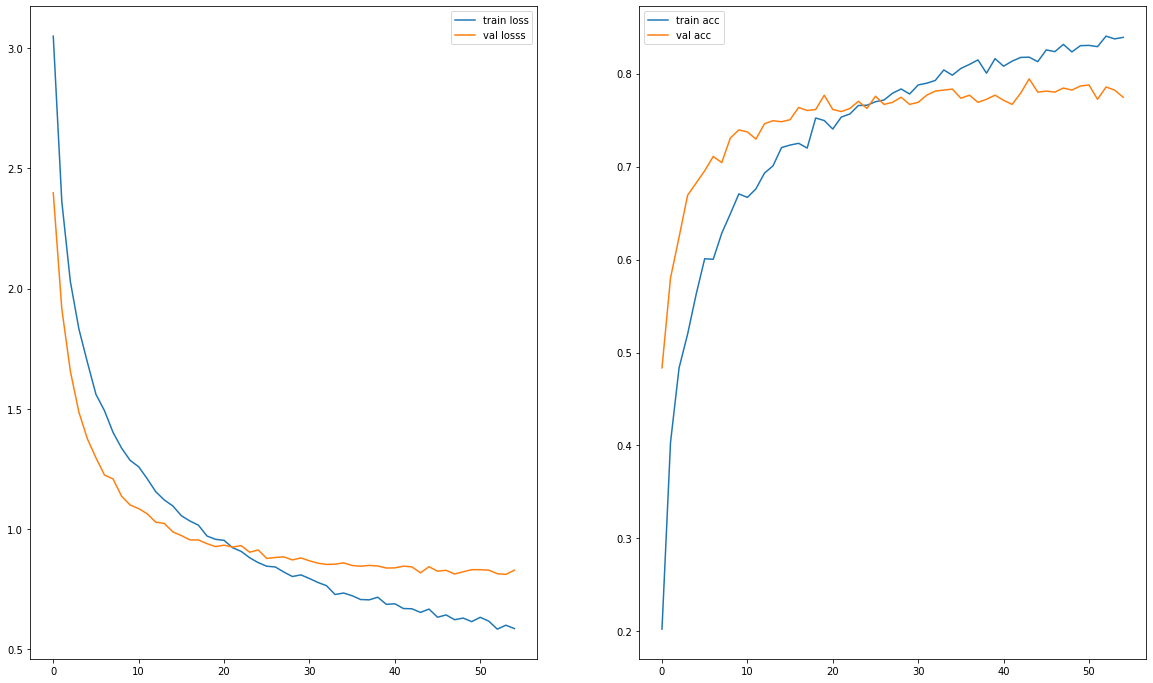

In [ ]:
plot_history(55, history_1)

# Fine-tuning

In [ ]:
base_model.trainable = True

optim = keras.optimizers.Adam(1e-5)
loss_fn = keras.losses.CategoricalCrossentropy()
model.compile(
    optimizer=optim,
    loss=loss_fn,
    metrics=[keras.metrics.CategoricalAccuracy()]
)

In [ ]:
epoch = 10
history_2 = model.fit(traindata_batch, epochs=epoch,
                      steps_per_epoch=116, 
                      validation_data=valdata_batch, 
                      validation_steps=29)

Epoch 1/10
116/116 [==============================] - 184s 2s/step - loss: 0.4486 - categorical_accuracy: 0.8650 - val_loss: 0.6457 - val_categorical_accuracy: 0.8242
Epoch 2/10
116/116 [==============================] - 177s 2s/step - loss: 0.3426 - categorical_accuracy: 0.8957 - val_loss: 0.6103 - val_categorical_accuracy: 0.8396
Epoch 3/10
116/116 [==============================] - 177s 2s/step - loss: 0.2958 - categorical_accuracy: 0.9100 - val_loss: 0.6369 - val_categorical_accuracy: 0.8297
Epoch 4/10
116/116 [==============================] - 176s 2s/step - loss: 0.2324 - categorical_accuracy: 0.9256 - val_loss: 0.5958 - val_categorical_accuracy: 0.8615
Epoch 5/10
116/116 [==============================] - 176s 2s/step - loss: 0.2244 - categorical_accuracy: 0.9264 - val_loss: 0.5591 - val_categorical_accuracy: 0.8637
Epoch 6/10
116/116 [==============================] - 177s 2s/step - loss: 0.1986 - categorical_accuracy: 0.9394 - val_loss: 0.5834 - val_categorical_accuracy: 0.857

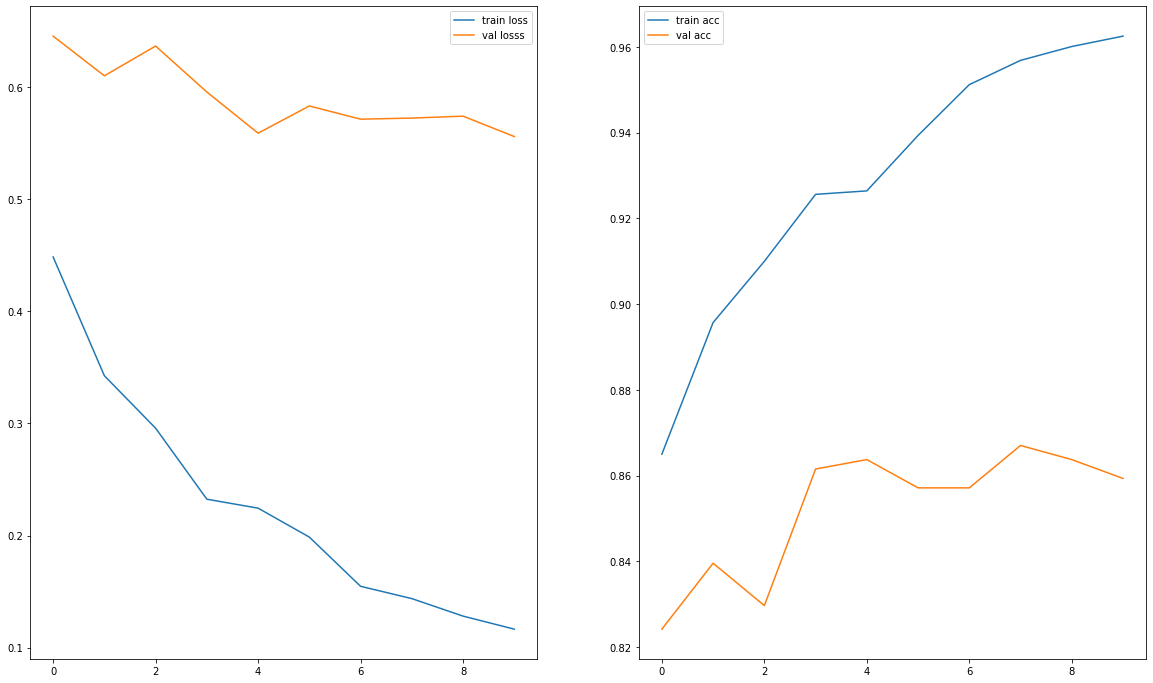

In [ ]:
plot_history(10, history_2)

In [ ]:
save_path = './drive/MyDrive/overwatch_recog/65epoch_xception_fine_tuning/'
model.save(save_path)

INFO:tensorflow:Assets written to: ./drive/MyDrive/overwatch_recog/65epoch_xception_fine_tuning/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
